# Importing Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import initializers
import matplotlib.pyplot as plt
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install unrar
!unrar x /content/drive/MyDrive/dataset.rar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/MyDrive/dataset.rar

Extracting  dataset.pickle                                                 3%  7% 11% 15% 19% 23% 27% 31% 35% 39% 43% 47% 51% 55% 59% 62% 66% 70% 74% 78% 82% 86% 90% 94% 98% 99%  OK 
All OK


In [6]:
f=open("dataset.pickle", "rb")
(X_train, y_train, X_val, y_val, X_test, y_test)=pickle.load(f)

## Hyperparameter Optimization

In [ ]:

# Model

number_of_node=[32,64,128,256]
number_of_dense_layers=[2,3,4,5]
for node in number_of_node:
  for d_layer in number_of_dense_layers:
    model = tf.keras.Sequential()

    # Feature Extraction
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", input_shape=(128, 128, 1)))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
    model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
    model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    # Flatten
    model.add(tf.keras.layers.Flatten())

    # Classification
    for i in range(d_layer):

      model.add(tf.keras.layers.Dense(node, activation="relu"))
      model.add(tf.keras.layers.Dropout(0.5))
      

    # Output Layer
    model.add(tf.keras.layers.Dense(10, activation="softmax"))

    model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    
    results=model.fit(X_train, y_train,
                 epochs=50,
                 validation_data=(X_val, y_val))
    
    model.evaluate(X_test,y_test)

In [147]:
model2 = tf.keras.Sequential()

    # Feature Extraction
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", input_shape=(128, 128, 1)))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model2.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model2.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

    # Flatten
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(128, activation="relu"))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(128, activation="relu"))
model2.add(tf.keras.layers.Dropout(0.5))
  

    # Output Layer
model2.add(tf.keras.layers.Dense(10, activation="softmax"))

In [148]:
model2.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])
    
results=model2.fit(X_train, y_train,
                 epochs=40,
                  batch_size=128,
                 validation_data=(X_val, y_val))

Epoch 1/40
55/55 [==============================] - 2s 27ms/step - loss: 2.0796 - accuracy: 0.2265 - val_loss: 1.6919 - val_accuracy: 0.3895
Epoch 2/40
55/55 [==============================] - 1s 21ms/step - loss: 1.6663 - accuracy: 0.3917 - val_loss: 1.3795 - val_accuracy: 0.5166
Epoch 3/40
55/55 [==============================] - 1s 22ms/step - loss: 1.4353 - accuracy: 0.4757 - val_loss: 1.2151 - val_accuracy: 0.5991
Epoch 4/40
55/55 [==============================] - 1s 21ms/step - loss: 1.2701 - accuracy: 0.5482 - val_loss: 1.0657 - val_accuracy: 0.6392
Epoch 5/40
55/55 [==============================] - 1s 21ms/step - loss: 1.1625 - accuracy: 0.5844 - val_loss: 0.9812 - val_accuracy: 0.6781
Epoch 6/40
55/55 [==============================] - 1s 21ms/step - loss: 1.0609 - accuracy: 0.6315 - val_loss: 0.8772 - val_accuracy: 0.7125
Epoch 7/40
55/55 [==============================] - 1s 21ms/step - loss: 0.9904 - accuracy: 0.6511 - val_loss: 0.8686 - val_accuracy: 0.7560
Epoch 8/40
55

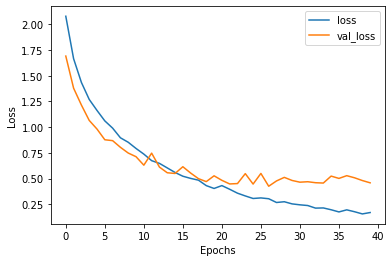

In [149]:
plt.plot(results.history['loss'], label="loss")
# Plot the the validation loss
plt.plot(results.history['val_loss'], label="val_loss")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Loss")
# Put legend table
plt.legend()
# Show the plot
plt.show()

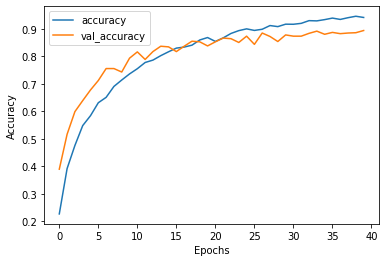

In [150]:
plt.plot(results.history['accuracy'], label="accuracy")


# Plot the the validation accuracy
plt.plot(results.history['val_accuracy'], label="val_accuracy")

# Name the x and y axises
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

# Put legend table
plt.legend()

# Show the plot
plt.show()

In [151]:
model2.evaluate(X_test, y_test)

28/28 [==============================] - 0s 5ms/step - loss: 0.4571 - accuracy: 0.9039


[0.4570925235748291, 0.9038901329040527]